# IMPORT LIBRARY

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# DATA OVERVIEW

In [113]:
df = pd.read_csv('Clicked Ads Dataset.csv', index_col=0)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [114]:
df.shape[0] #cek jumlah data

1000

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 85.9+ KB


In [116]:
df[df['Daily Internet Usage'].isnull()]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
18,54.70,36,217612780.0,NaN,Laki-Laki,2/13/2016 7:53,Yes,Makassar,Sulawesi Selatan,Travel
63,NaN,32,431207350.0,NaN,Laki-Laki,3/31/2016 20:55,No,Makassar,Sulawesi Selatan,Finance
99,79.71,34,486197810.0,NaN,Laki-Laki,7/2/2016 14:57,No,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Electronic
158,80.46,27,NaN,NaN,Laki-Laki,2/4/2016 2:13,No,Bandar Lampung,Lampung,Bank
247,57.05,41,351952230.0,NaN,Laki-Laki,1/9/2016 3:45,Yes,Bekasi,Jawa Barat,Food
491,59.12,33,197470210.0,NaN,Perempuan,5/12/2016 21:32,Yes,Makassar,Sulawesi Selatan,Finance
619,74.54,24,402631110.0,NaN,Perempuan,3/30/2016 16:15,No,Makassar,Sulawesi Selatan,Food
653,86.53,46,325500770.0,NaN,Perempuan,6/29/2016 1:19,No,Semarang,Jawa Tengah,Electronic
739,82.37,30,445650240.0,NaN,Perempuan,6/29/2016 4:23,No,Palembang,Sumatra Selatan,House
926,72.55,22,412671070.0,NaN,Perempuan,2/8/2016 7:33,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Otomotif


In [117]:
df['Timestamp'] = pd.to_datetime(df['Timestamp']) #merubah tipe data menjadi date

In [118]:
#group by data type
df_num = df.select_dtypes(exclude=['object','datetime64'])
df_cat = df.select_dtypes(exclude=['datetime64','float64','int64'])

In [119]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [120]:
df['Daily Time Spent on Site'].fillna(0, inplace=True) #asumsi bahwa user tidak mengunjungi site atau salah click
df['Area Income'].fillna(0, inplace=True)   #asumsi bahwa user tidak memiliki income (jobless)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(), inplace=True) #asumsi dengan mean

In [121]:
df_desc_cat = df_cat.describe().T.reset_index()
df_desc_cat['Mode(%)'] = (df_desc_cat['freq'] / df_desc_cat['count'])*100
df_desc_cat['Mode(%)'] = df_desc_cat['Mode(%)'].apply(lambda x: round(x,2))
df_desc_cat.rename(columns={'index':'feature'})
df_desc_cat

,index,count,unique,top,freq,Mode(%)
0,Male,997,2,Perempuan,518,51.96
1,Clicked on Ad,1000,2,No,500,50.00
2,city,1000,30,Surabaya,64,6.40
3,province,1000,16,Daerah Khusus Ibukota Jakarta,253,25.30
4,category,1000,10,Otomotif,112,11.20


In [122]:
df.rename(columns = {'Male':'Gender'}, inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True) #asumsi user menggunakan mode

# EXPLORATORY DATA ANALYSIS (EDA)

## Univariate Analysis

### Age

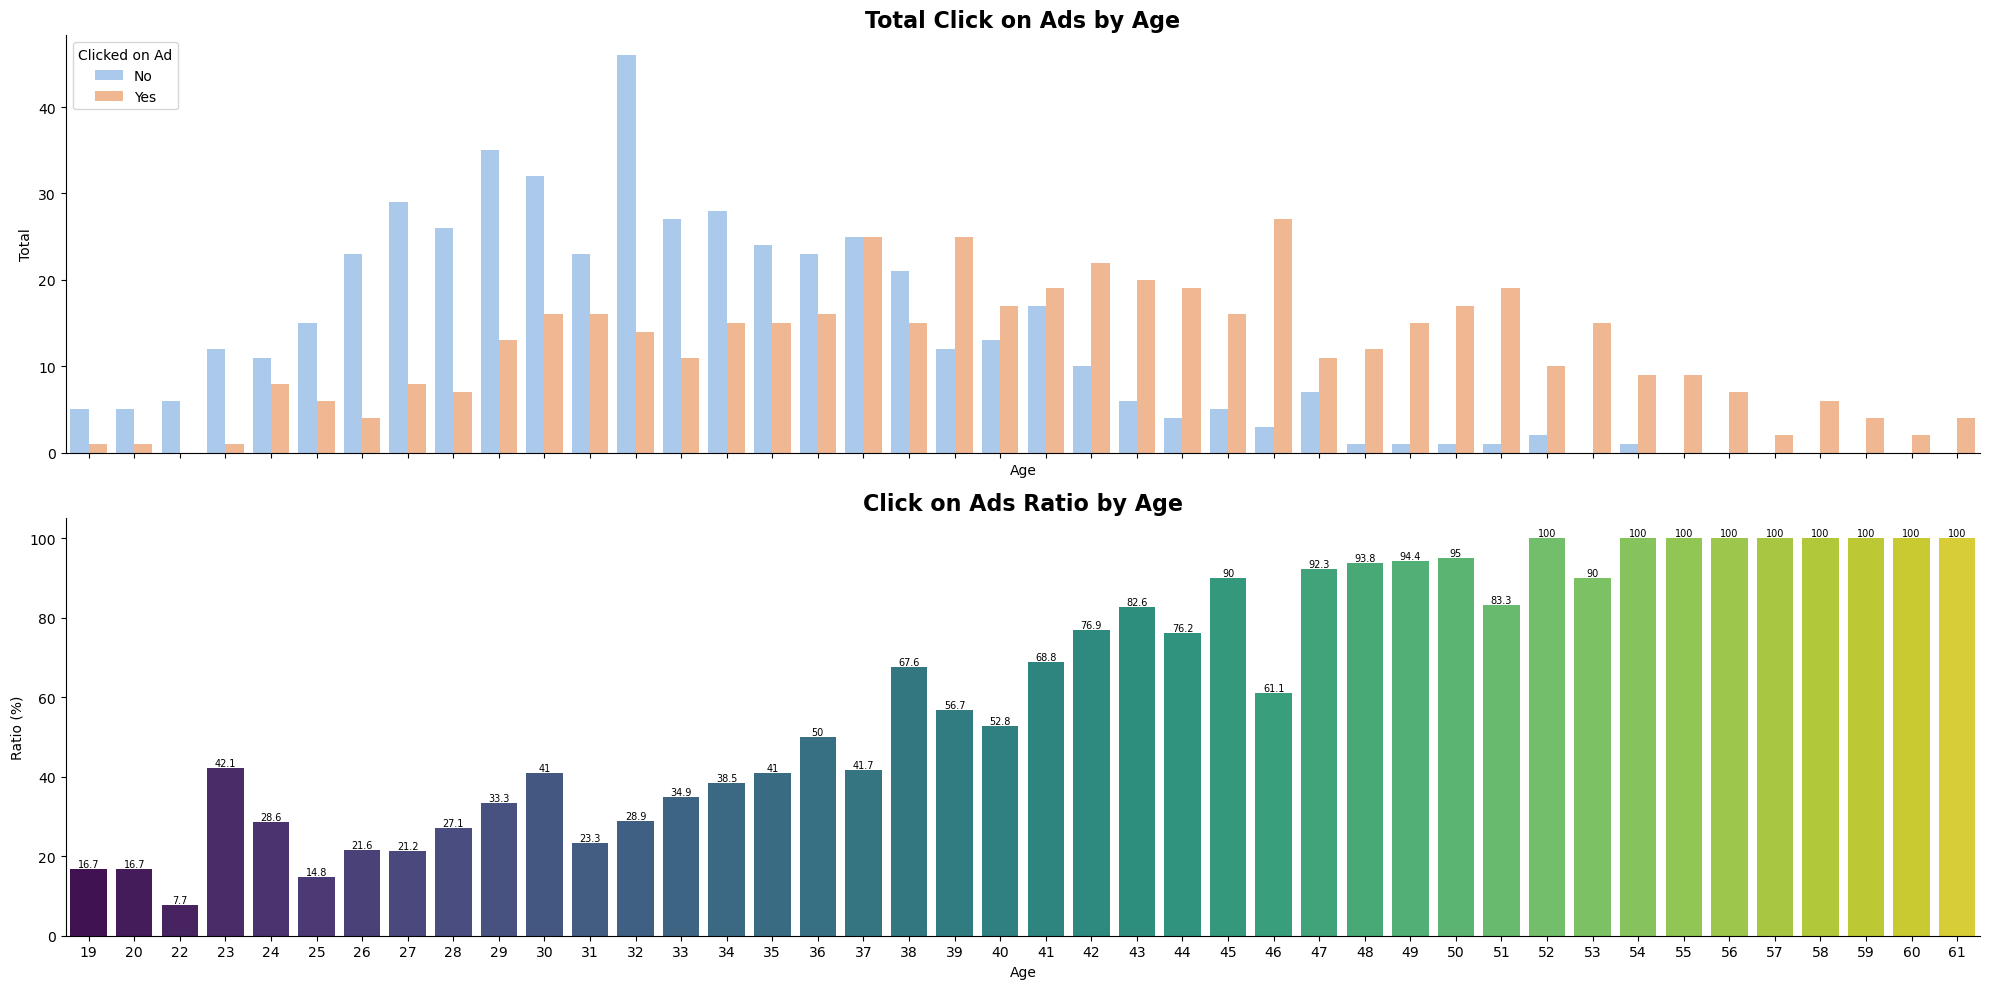

In [123]:
#membuat table umur, click ads dan perbandingan cust yang klik ads
dfg = df.groupby(['Age','Clicked on Ad']).agg({'Gender':'count'}).rename(columns={'Gender':'Jumlah'}).reset_index()
dfg1 = df.groupby(['Age']).agg({'Gender':'count'}).rename(columns={'Gender':'Total'}).reset_index()
dfg = pd.merge(dfg, dfg1, on='Age', how='outer') #join untuk keperluan menghitung ratio
dfg['Ratio'] = dfg['Jumlah']/dfg['Total'] 
dfg['Ratio'] = round(dfg['Ratio'],3) * 100

#plot
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,10), sharex=True) #mengatur dimensi plot
sns.barplot(ax=ax1, data=dfg, x='Age', y='Jumlah', hue='Clicked on Ad', palette='pastel')
sns.barplot(ax=ax2, data=dfg[dfg['Clicked on Ad']=='Yes'], x='Age', y='Ratio', palette='viridis')

#set title
ax1.set_title('Total Click on Ads by Age', weight='bold', size=16)
ax2.set_title('Click on Ads Ratio by Age', weight='bold', size=16)
ax1.set_ylabel('Total')
ax2.set_ylabel('Ratio (%)')
plt.bar_label(ax2.containers[0], size=7)

sns.despine()
plt.tight_layout()
plt.show()

### Time Spent on Site

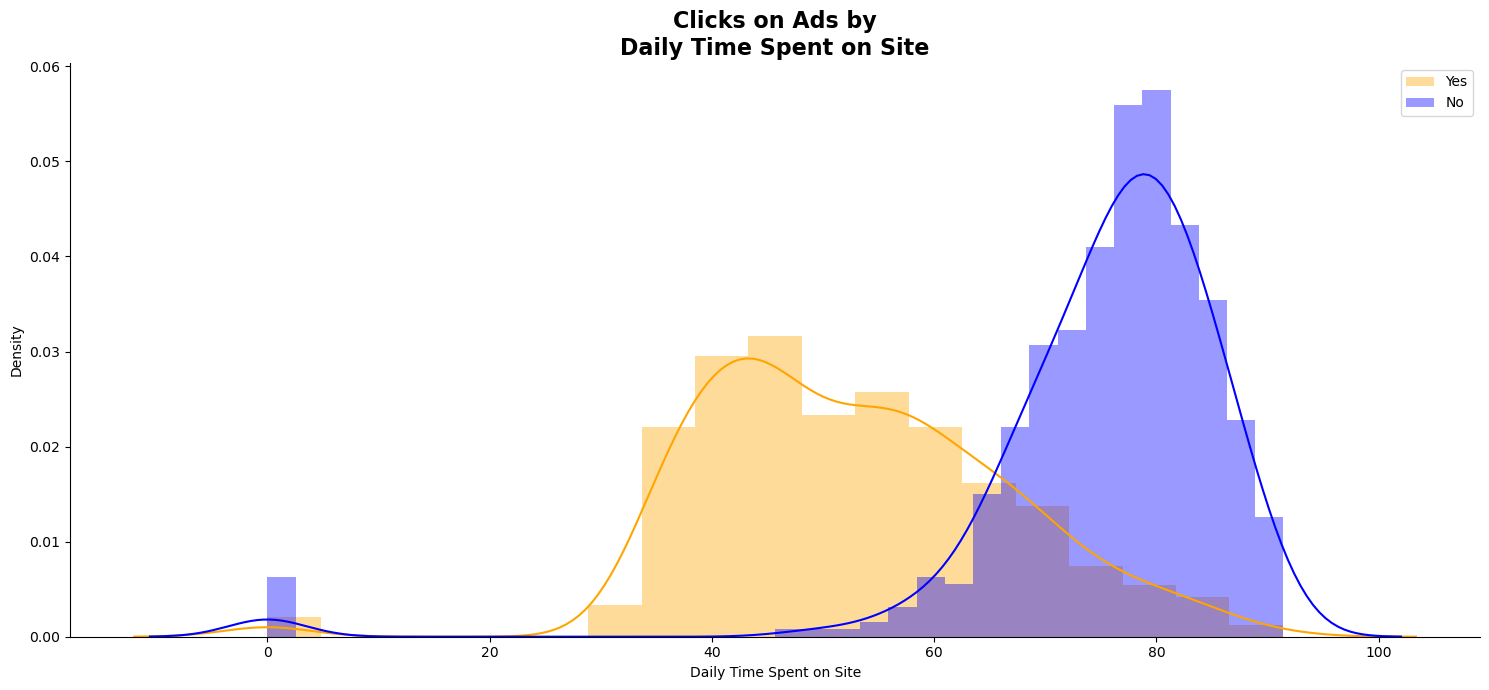

In [124]:
yes_ads = df[df['Clicked on Ad'] == 'Yes']
no_ads = df[df['Clicked on Ad'] == 'No']

#plot
plt.figure(figsize=(15,7))
sns.distplot(yes_ads['Daily Time Spent on Site'], label= 'Yes', color='orange')
sns.distplot(no_ads['Daily Time Spent on Site'], label='No', color='blue')
plt.legend(loc='best')
plt.title('Clicks on Ads by\nDaily Time Spent on Site', weight='bold', size = 16)

sns.despine()
plt.tight_layout()
plt.show()

### Daily Internet Usage

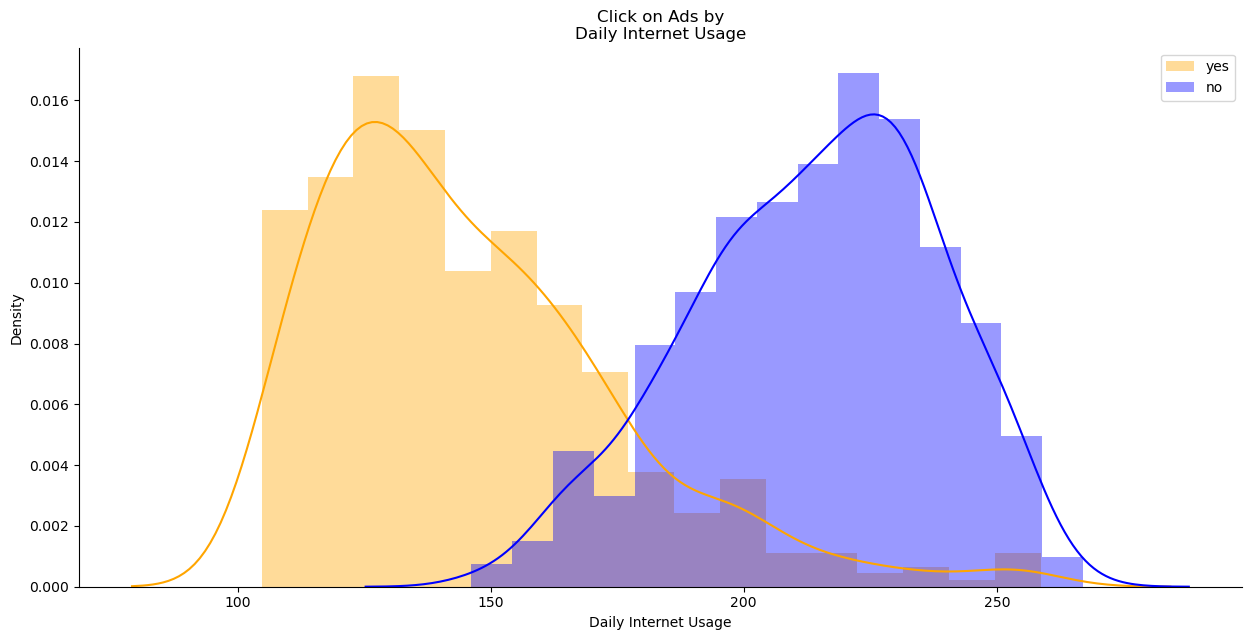

In [125]:
#plot
plt.figure(figsize=(15,7))
sns.distplot(yes_ads['Daily Internet Usage'], label='yes', color='orange')
sns.distplot(no_ads['Daily Internet Usage'], label='no', color='blue')
sns.despine()
plt.title('Click on Ads by\nDaily Internet Usage')
plt.legend(loc='best')
plt.show()

## Bivariate Analysis

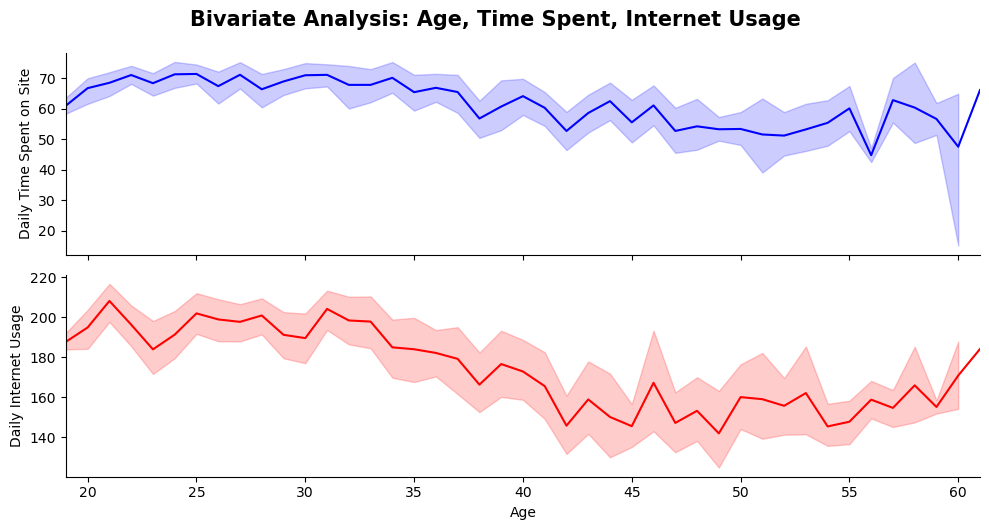

In [126]:
fig, ax = plt.subplots(2, 1, figsize=(10,5))

sns.lineplot(ax=ax[0], data=df, x='Age', y='Daily Time Spent on Site', color='blue')
sns.lineplot(ax=ax[1], data=df, x='Age', y='Daily Internet Usage', color='red')

ax[0].set_xticklabels([])  # Menghilangkan keterangan sumbu x pada plot pertama
ax[0].set_xlabel("")  # Menghilangkan label 'Age' pada sumbu x pada plot pertama

sns.despine()

# Penyesuaian ruang antara subplot
plt.subplots_adjust(hspace=5)  # Mengatur jarak vertikal antara subplot
plt.subplots_adjust(wspace=1)  # Mengatur jarak horizontal antara subplot

plt.tight_layout()

#set limit
ax[0].set_xlim(19, 61)
ax[1].set_xlim(19, 61)

# Title
fig.suptitle('Bivariate Analysis: Age, Time Spent, Internet Usage', weight='bold', fontsize=15, y=1.05)  # Menambahkan parameter y untuk mengatur jarak judul

plt.show()

## Multivariate Analysis

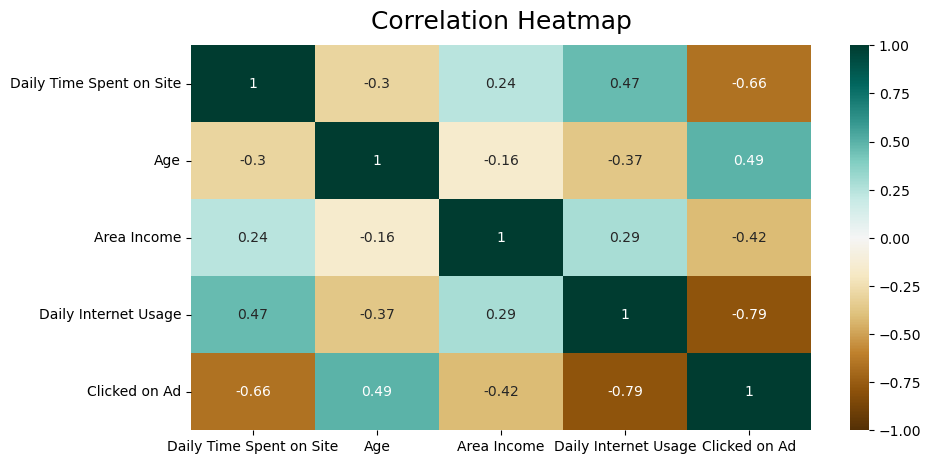

In [127]:
# Copy dataframe
df_corr = df.copy()
df_corr['Clicked on Ad'].replace({'No': 0, 'Yes': 1}, inplace=True)
df_num = df_corr.select_dtypes(exclude=['object', 'datetime64'])

# Plot
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df_num.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Title
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

plt.show()

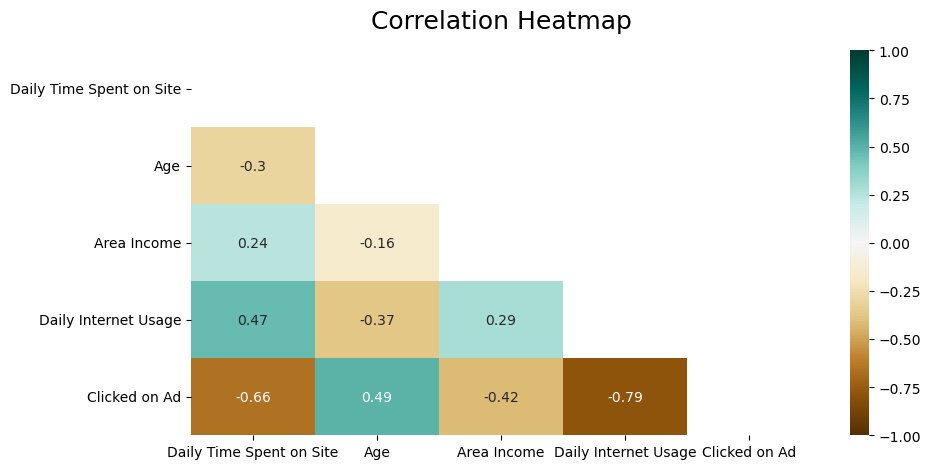

In [128]:
# Copy dataframe
df_corr = df.copy()
df_corr['Clicked on Ad'].replace({'No': 0, 'Yes': 1}, inplace=True)
df_num = df_corr.select_dtypes(exclude=['object', 'datetime64'])

# Plot
plt.figure(figsize=(10, 5))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_num.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_num.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Title
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

plt.show()

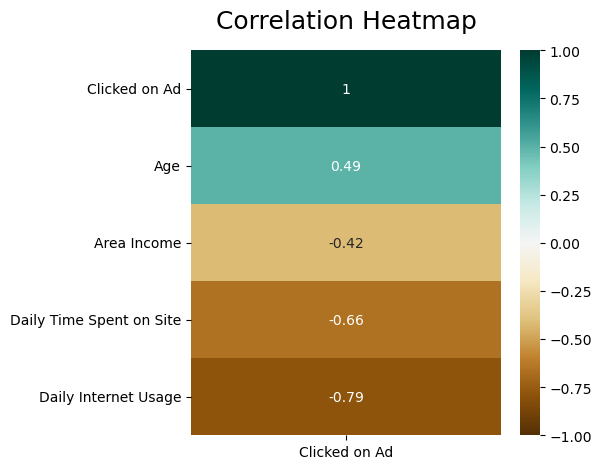

In [129]:
# Copy dataframe
df_corr = df.copy()
df_corr['Clicked on Ad'].replace({'No': 0, 'Yes': 1}, inplace=True)
df_num = df_corr.select_dtypes(exclude=['object', 'datetime64'])
corr = df_num.corr()[['Clicked on Ad']].sort_values(by='Clicked on Ad', ascending=False)

# Plot
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Title
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

plt.show()